## PART 1

In [2]:
import pandas as pd

file_path = 'amz_uk_price_prediction_dataset.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Mostrar las primeras filas para ver cómo se ve el dataset
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Ver el tamaño del dataset (número de filas y columnas)
print(f'Tamaño del dataset: {df.shape}')

# Ver las columnas del dataset
print(f'Columnas del dataset: {df.columns}')

# Ver estadísticas descriptivas de las columnas numéricas
print(df.describe())


Tamaño del dataset: (2443651, 9)
Columnas del dataset: Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')
                uid         stars       reviews         price  \
count  2.443651e+06  2.443651e+06  2.443651e+06  2.443651e+06   
mean   1.370545e+06  2.152836e+00  4.806278e+02  8.924381e+01   
std    8.160562e+05  2.194865e+00  5.944124e+03  3.456089e+02   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.589215e+05  0.000000e+00  0.000000e+00  9.990000e+00   
50%    1.349029e+06  0.000000e+00  0.000000e+00  1.909000e+01   
75%    2.060686e+06  4.400000e+00  5.900000e+01  4.599000e+01   
max    2.828593e+06  5.000000e+00  1.356658e+06  1.000000e+05   

       boughtInLastMonth  
count       2.443651e+06  
mean        2.589699e+01  
std         2.404837e+02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max 

In [4]:
# Verificar si hay valores nulos en el dataset
print(df.isnull().sum())


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64


In [5]:
# Create a crosstab to show the relationship between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort the crosstab by the proportion of best-sellers in descending order
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)
print(crosstab_sorted)

isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
...                                  ...       ...
Power Supplies                  1.000000  0.000000
Ski Helmets                     1.000000  0.000000
Ski Goggles                     1.000000  0.000000
Snowboard Boots                 1.000000  0.000000
eBook Readers & Accessories     1.000000  0.000000

[296 rows x 2 columns]


In [6]:
from scipy.stats import chi2_contingency
import numpy as np

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Compute Cramér's V to measure the strength of association
n = df.shape[0]
min_dim = min(crosstab.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Chi-square p-value: {p}")
print(f"Cramér's V: {cramer_v}")


Chi-square p-value: 1.0
Cramér's V: 0.0012654333071309496


In [7]:
from scipy.stats import chi2_contingency
import numpy as np

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Compute Cramér's V to measure the strength of association
n = df.shape[0]
min_dim = min(crosstab.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Chi-square p-value: {p}")
print(f"Cramér's V: {cramer_v}")


Chi-square p-value: 1.0
Cramér's V: 0.0012654333071309496


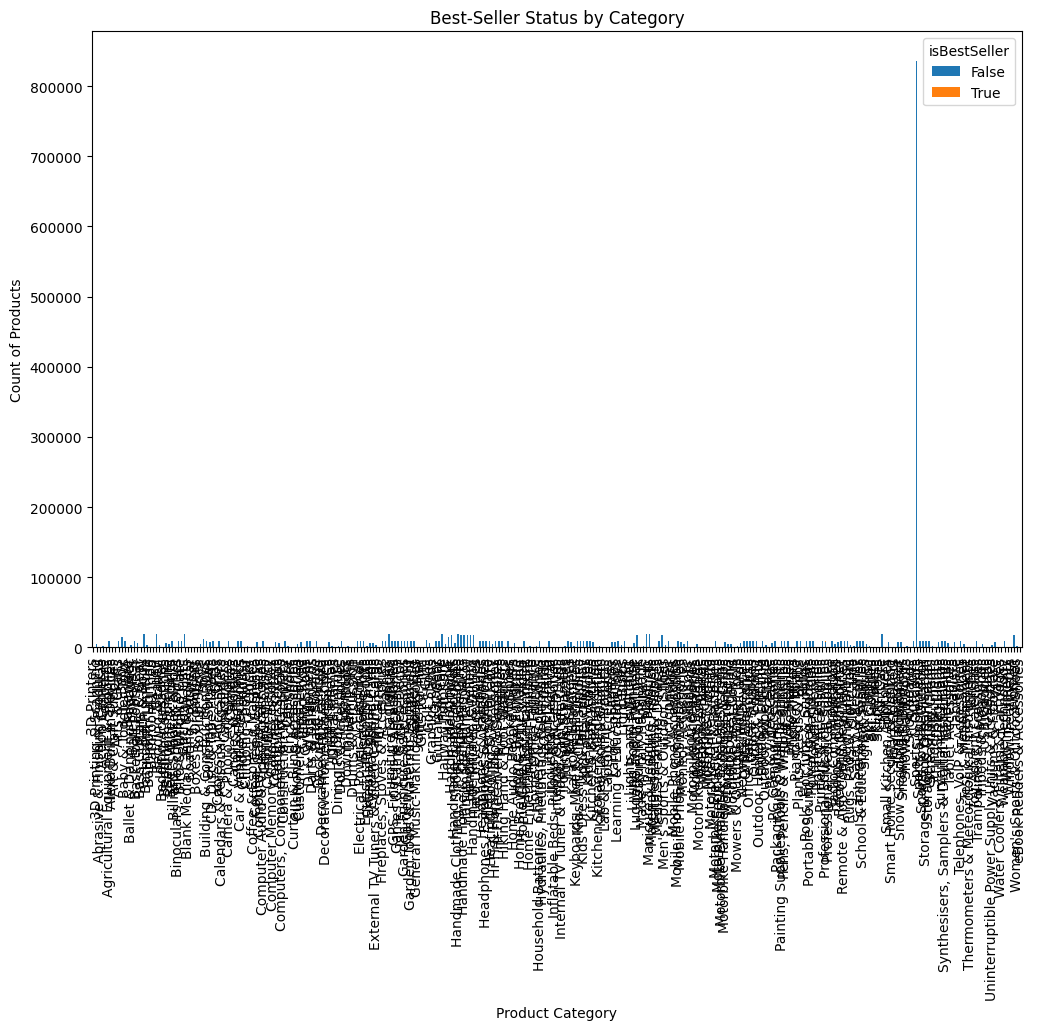

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of the counts
category_best_seller = pd.crosstab(df['category'], df['isBestSeller'])

# Plot the stacked bar chart
category_best_seller.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Best-Seller Status by Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Products')
plt.xticks(rotation=90)
plt.show()


## PART 2

In [9]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for removing outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


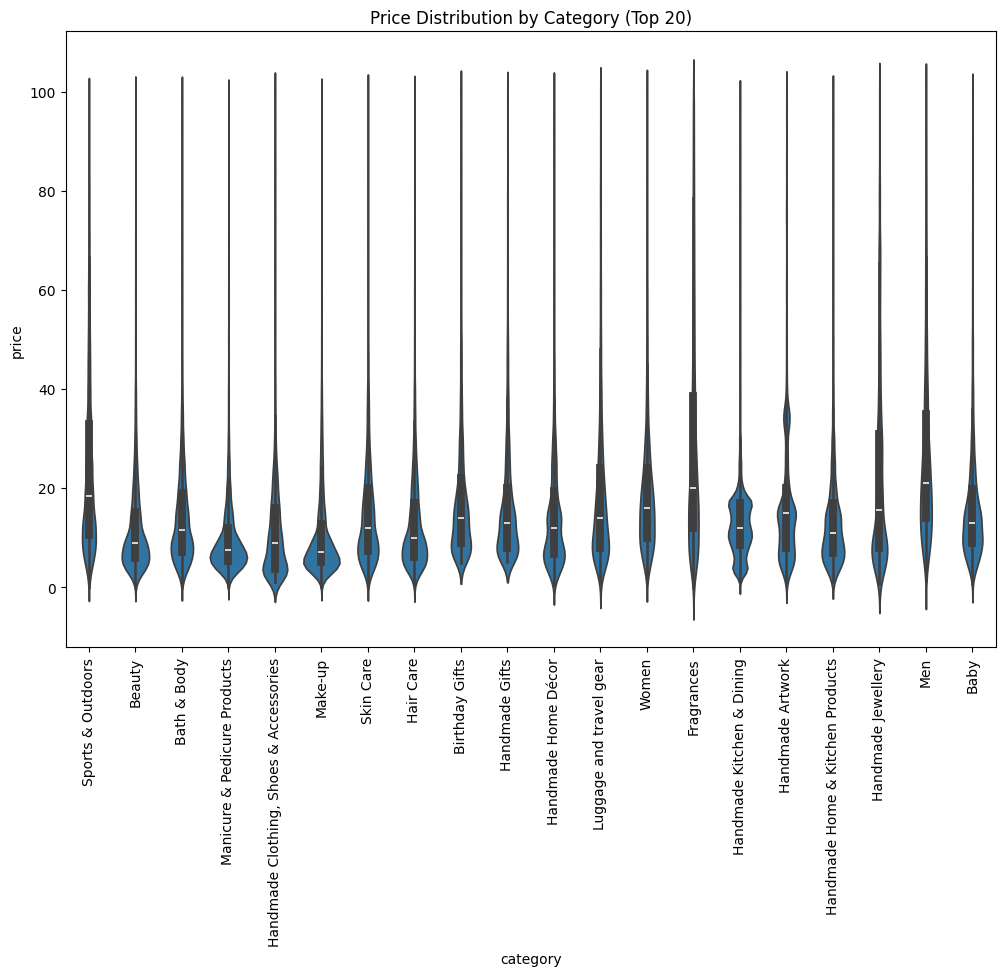

In [10]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_no_outliers, x='category', y='price', order=df_no_outliers['category'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Price Distribution by Category (Top 20)')
plt.show()


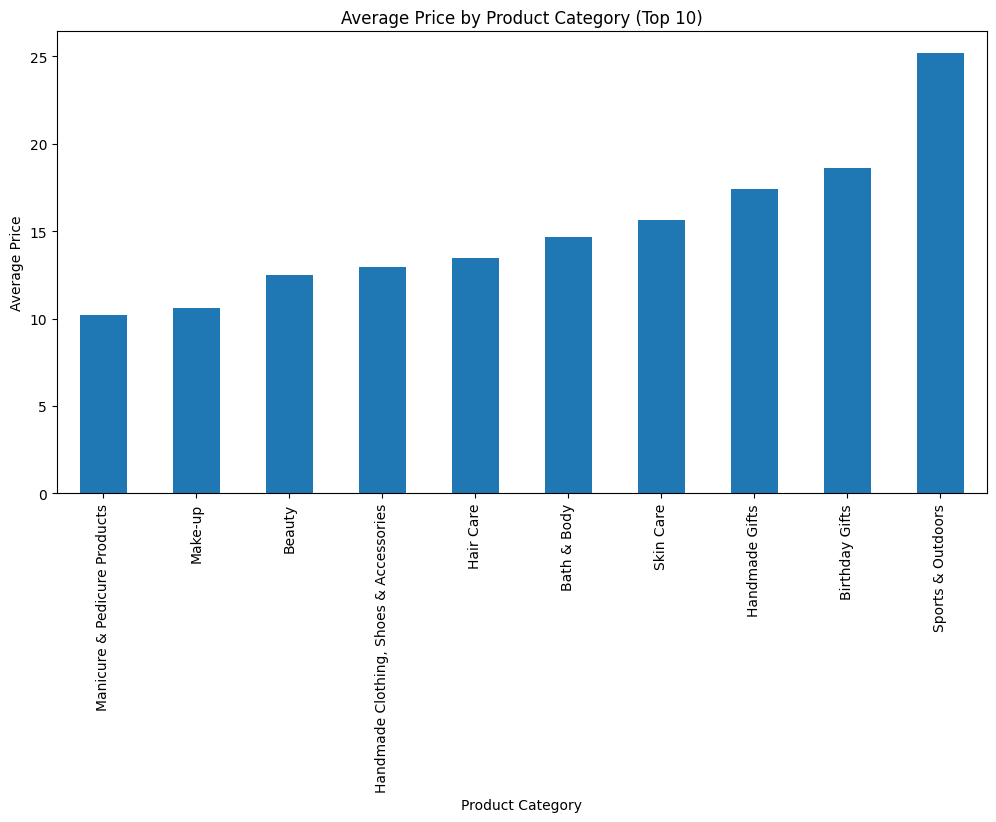

In [11]:
top_10_categories = df_no_outliers['category'].value_counts().index[:10]
avg_price_by_category = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()

plt.figure(figsize=(12, 6))
avg_price_by_category.sort_values().plot(kind='bar')
plt.title('Average Price by Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [15]:
# Ver las primeras filas y las columnas del dataset
print(df.columns)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


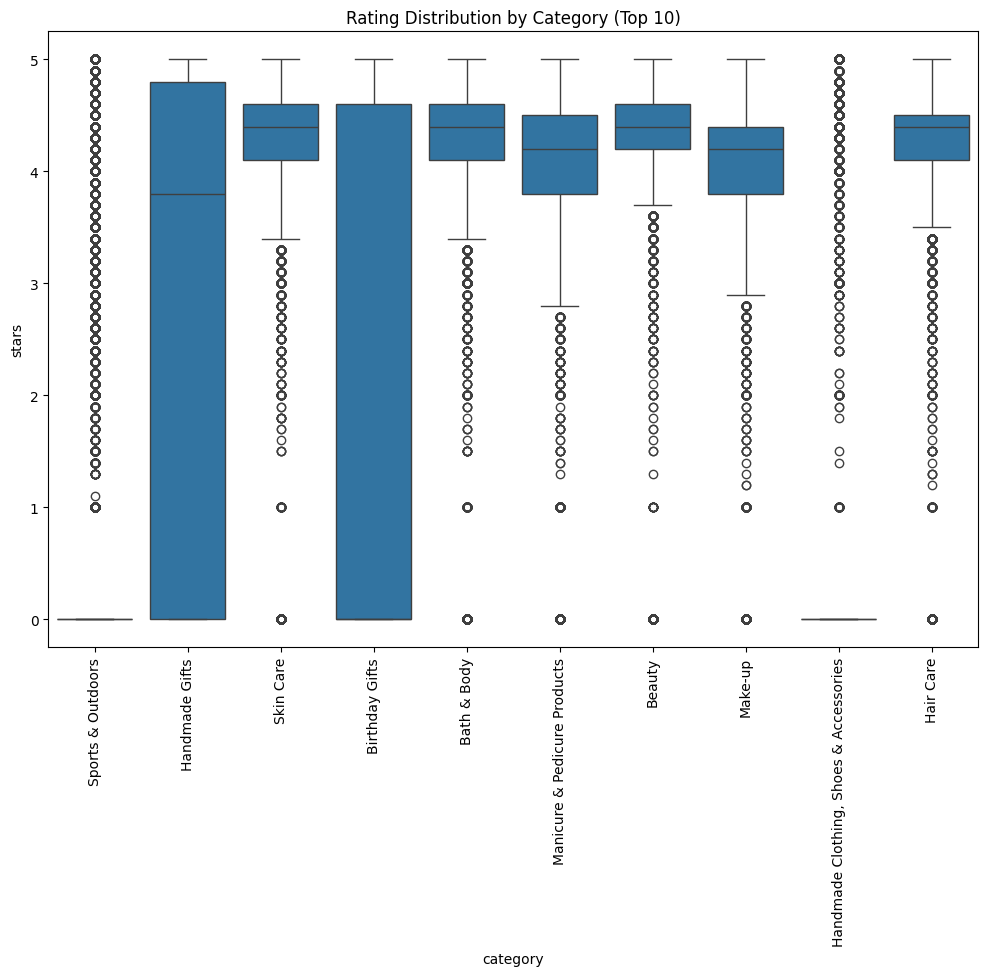

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['category'].isin(top_10_categories)], x='category', y='stars')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category (Top 10)')
plt.show()


In [17]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")


Correlation coefficient between price and stars: -0.07767299878181323


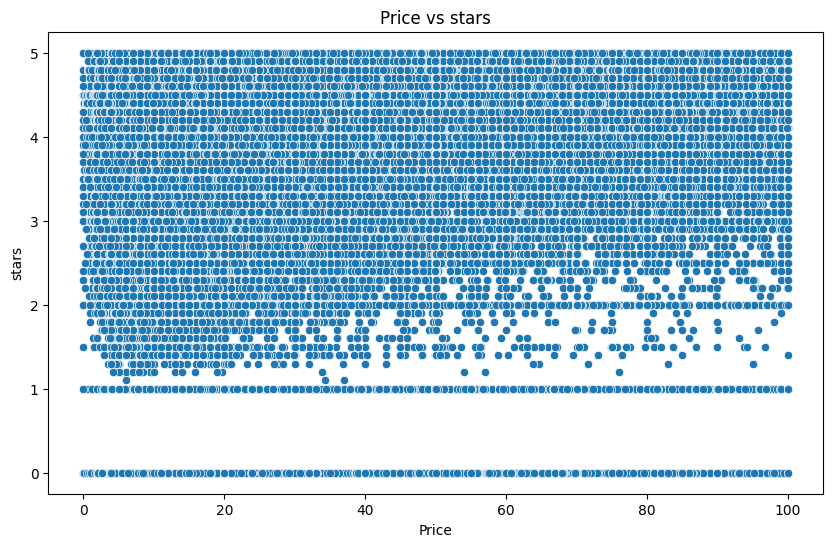

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='price', y='stars')
plt.title('Price vs stars')
plt.xlabel('Price')
plt.ylabel('stars')
plt.show()


In [24]:
# Convertir a numérico y manejar errores (como valores no numéricos)
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Reemplaza con NaN los valores no numéricos
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')  # Igualmente para stars


In [ ]:
corr_matrix = df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


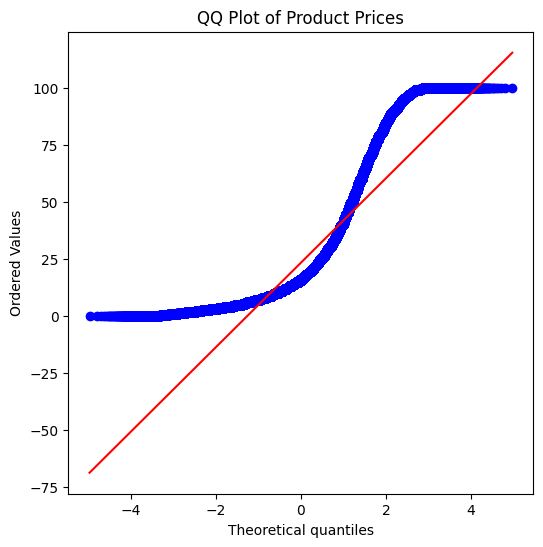

In [21]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()


In [22]:
# For comparison, you can repeat the steps above without filtering out outliers
df_full = df  # This will keep all the data without removing outliers
